#### Import Module

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from setting import *

#### Load Data

In [2]:
data = pd.read_csv('../../selected_data/1_content_img/kpca_512_1.csv')
data

,id,KernelPCA_1,KernelPCA_2,KernelPCA_3,KernelPCA_4,KernelPCA_5,KernelPCA_6,KernelPCA_7,KernelPCA_8,KernelPCA_9,...,KernelPCA_504,KernelPCA_505,KernelPCA_506,KernelPCA_507,KernelPCA_508,KernelPCA_509,KernelPCA_510,KernelPCA_511,KernelPCA_512,success_x
0,NMN2,0.199407,-0.010943,0.035395,0.201375,-0.029450,-0.108502,0.065207,0.020178,0.088080,...,-0.007061,-0.015442,-0.011138,-0.019055,0.028579,0.002669,-0.006605,-0.015769,-0.014158,1
1,ZENLET-The-Dual,-0.337681,-0.063975,0.023253,0.005840,-0.069054,-0.046002,-0.054222,-0.013374,0.030484,...,-0.000105,0.000536,-0.000233,0.000708,-0.000260,0.000608,0.000027,0.000130,0.000411,1
2,hhl-penzhai,0.169441,-0.037803,-0.051317,-0.074069,-0.026543,-0.061678,-0.025125,-0.010475,0.030416,...,-0.012345,-0.018161,0.012664,0.006473,0.011861,-0.010019,0.021017,0.007871,0.003488,1
3,scion-36,0.435331,-0.062197,-0.028548,-0.087882,-0.030837,-0.043236,-0.028600,0.031288,-0.011621,...,-0.005308,0.019413,0.031520,-0.011183,0.007770,0.022641,-0.004419,-0.008386,-0.010735,1
4,amt-cube,0.381850,-0.027375,-0.025540,0.028855,-0.012985,-0.070809,0.042137,-0.039545,0.062020,...,-0.014173,-0.031018,-0.018857,-0.019347,-0.015571,-0.002922,-0.001176,0.001642,-0.015039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,wlm-tw,-0.290649,0.073056,-0.121464,0.000952,0.064736,0.070605,-0.004790,-0.052634,-0.078276,...,-0.012302,-0.045815,0.016772,-0.003950,-0.008455,-0.000561,0.014832,0.011259,0.007771,0
5608,8bowchou,-0.337681,-0.063975,0.023253,0.005840,-0.069054,-0.046002,-0.054222,-0.013374,0.030484,...,-0.000105,0.000536,-0.000233,0.000708,-0.000260,0.000608,0.000027,0.000130,0.000411,0
5609,bananalin,-0.337681,-0.063975,0.023253,0.005840,-0.069054,-0.046002,-0.054222,-0.013374,0.030484,...,-0.000105,0.000536,-0.000233,0.000708,-0.000260,0.000608,0.000027,0.000130,0.000411,0
5610,fooddesignlab,-0.337681,-0.063975,0.023253,0.005840,-0.069054,-0.046002,-0.054222,-0.013374,0.030484,...,-0.000105,0.000536,-0.000233,0.000708,-0.000260,0.000608,0.000027,0.000130,0.000411,0


In [3]:
x_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]
y_data.value_counts()

success_x
1    4286
0    1326
Name: count, dtype: int64

In [4]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

# --- Split Data ---
norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(norm_x_data, y_data, test_size=0.3, random_state=30)
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=30)

# Undersample
sampler = RandomUnderSampler()
under_train_x, under_train_y = sampler.fit_resample(train_x, train_y)

# Undersample
sampler = RandomOverSampler()
over_train_x, over_train_y = sampler.fit_resample(train_x, train_y)

#### Naive Bayes
> ref: https://scikit-learn.org/stable/modules/naive_bayes.html
* 模型選擇： Complement NB（不可使用負數，需先經過正規化）
* 使用資料：正規化後資料

---- Normalized Data ----
Accuracy: 0.61
Recall: 0.6
Precision: 0.84
F1-Score: 0.7
F0.5-Score: 0.78
F0.3-Score: 0.81


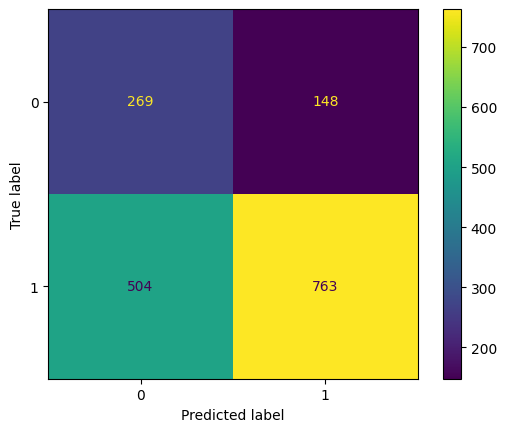

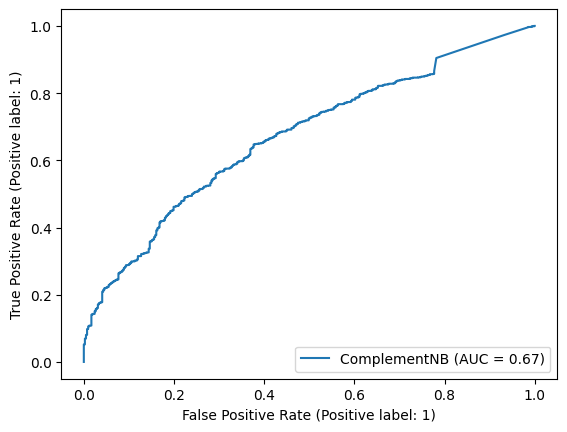

In [5]:
print('---- Normalized Data ----')

model = ComplementNB()
model.fit(norm_train_x, norm_train_y)

pred_y = model.predict(norm_test_x)

result_report(model, norm_test_x, norm_test_y, pred_y)

#### Logistic Regression
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 模型選擇： Logistic Regression
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 0.99
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.78


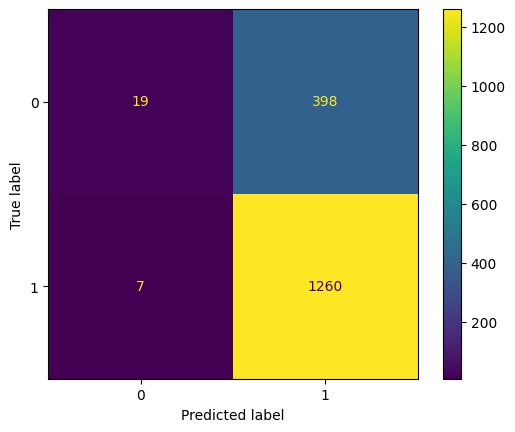

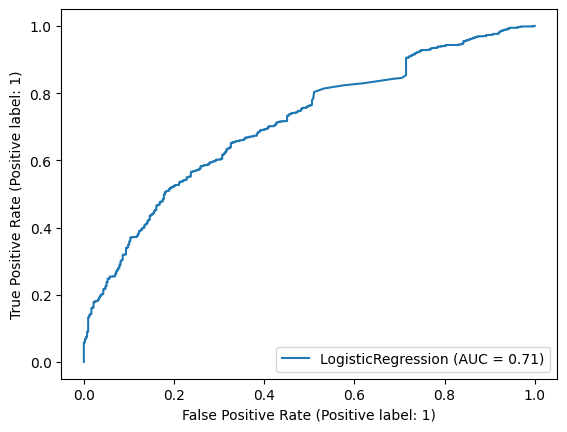

---- Under Sample Data ----
Accuracy: 0.63
Recall: 0.61
Precision: 0.86
F1-Score: 0.71
F0.5-Score: 0.79
F0.3-Score: 0.83


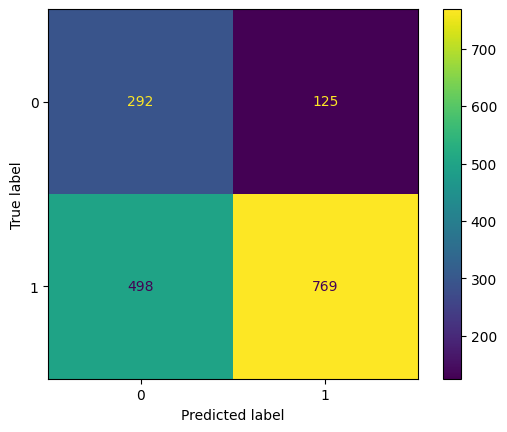

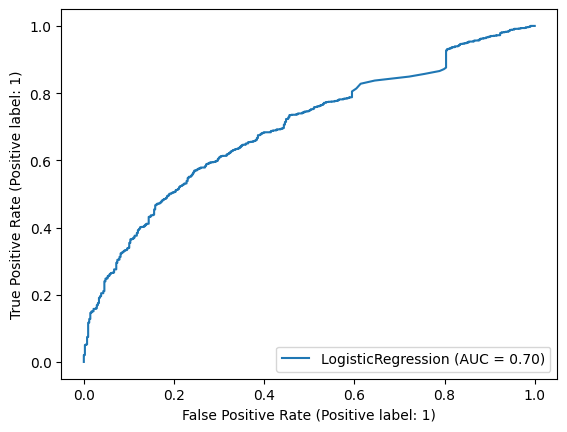

---- Over Sample Data ----
Accuracy: 0.65
Recall: 0.65
Precision: 0.85
F1-Score: 0.74
F0.5-Score: 0.8
F0.3-Score: 0.83


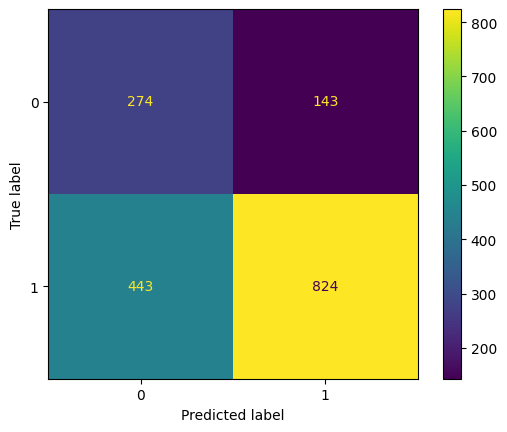

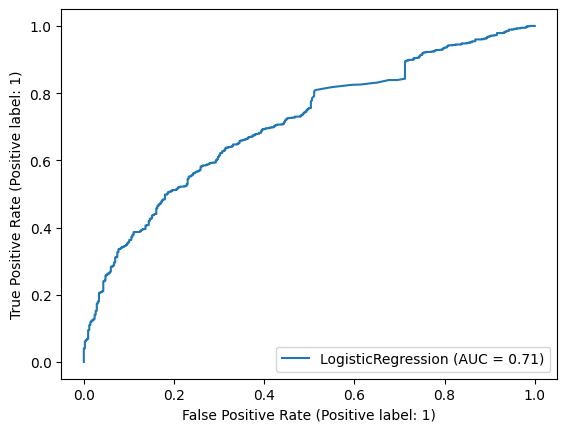

In [6]:
print('---- Original Data ----')
model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = LogisticRegression()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = LogisticRegression()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### SVM
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* 模型選擇：SVC
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 0.99
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.77


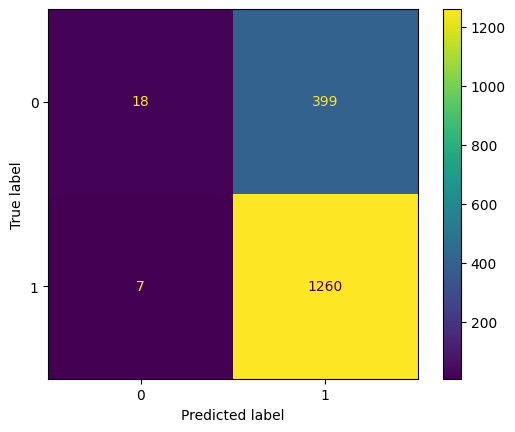

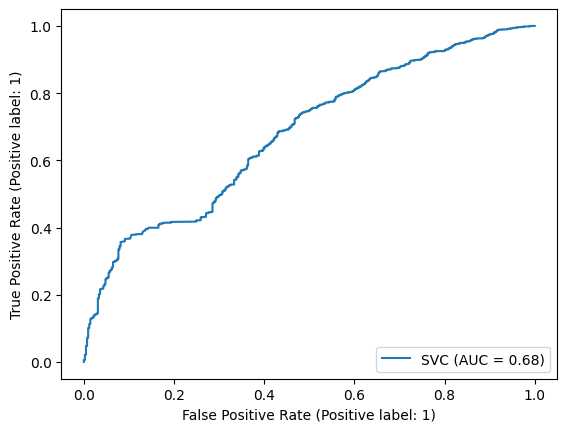

---- Under Sample Data ----
Accuracy: 0.61
Recall: 0.58
Precision: 0.86
F1-Score: 0.69
F0.5-Score: 0.78
F0.3-Score: 0.82


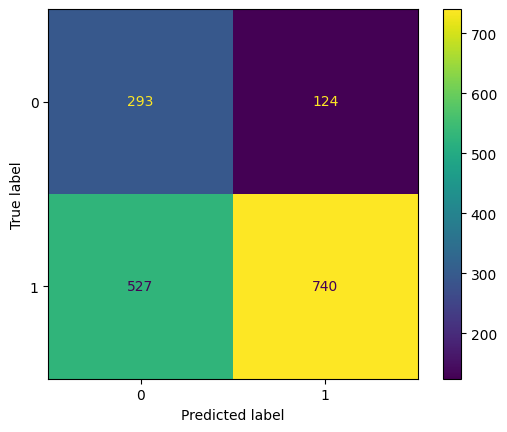

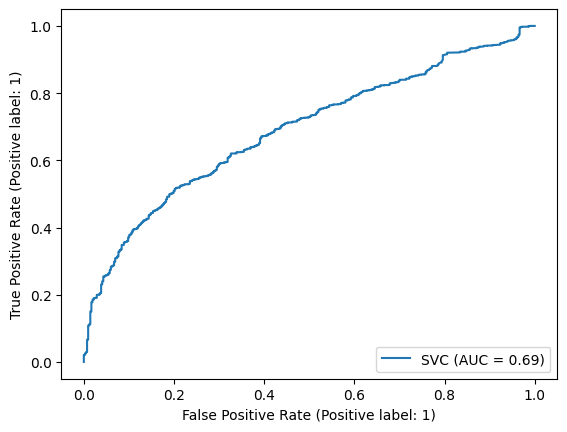

---- Over Sample Data ----
Accuracy: 0.69
Recall: 0.76
Precision: 0.81
F1-Score: 0.79
F0.5-Score: 0.8
F0.3-Score: 0.81


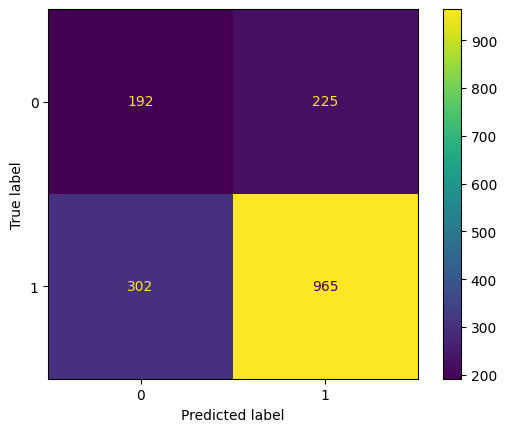

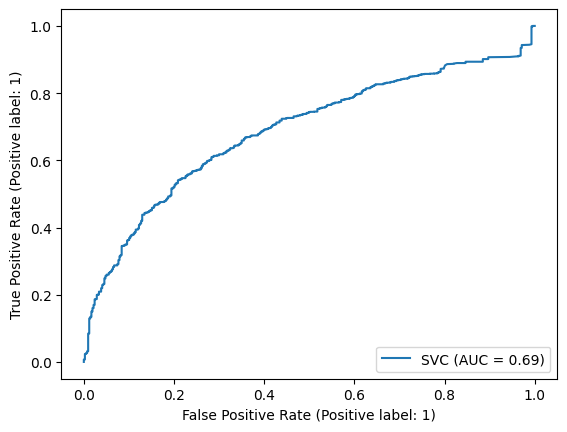

In [7]:
print('---- Original Data ----')
model = SVC()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = SVC()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = SVC()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### Random Forest

> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 模型選擇： Random Forest
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.99
Precision: 0.75
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


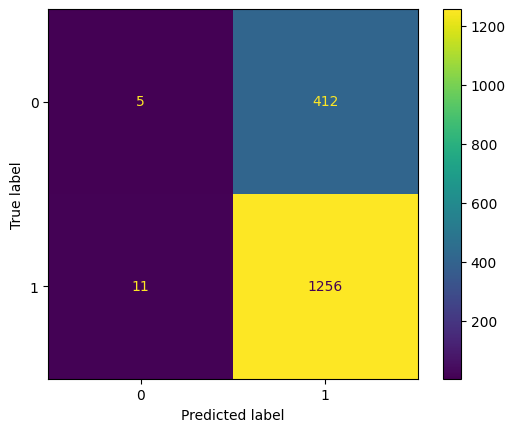

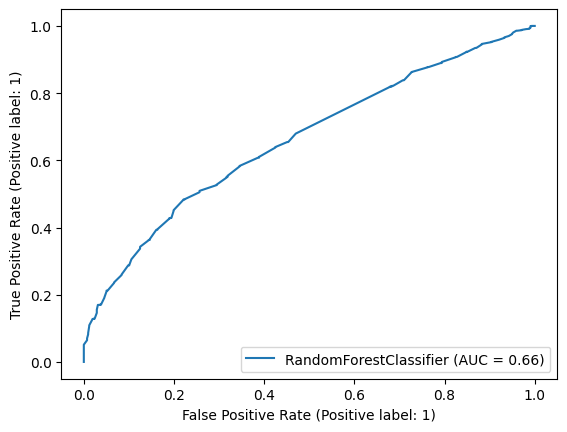

---- Under Sample Data ----
Accuracy: 0.58
Recall: 0.54
Precision: 0.85
F1-Score: 0.66
F0.5-Score: 0.76
F0.3-Score: 0.81


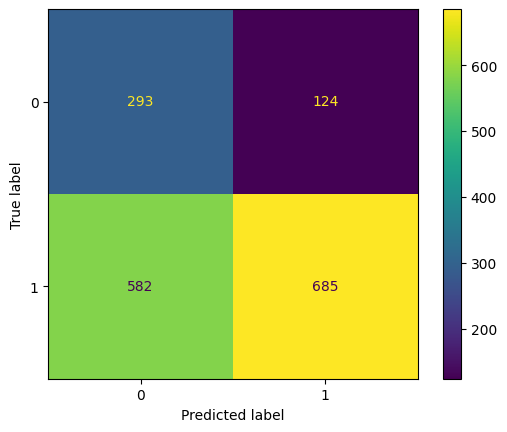

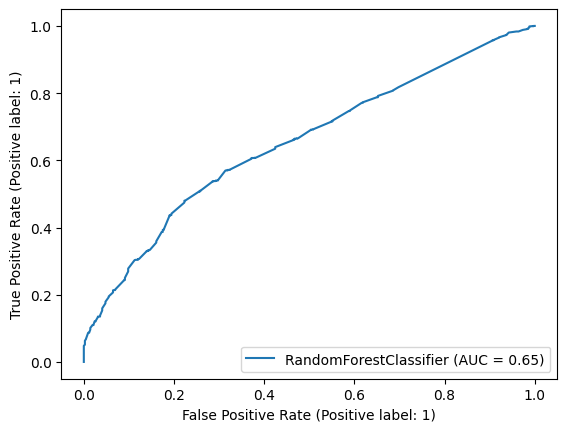

---- Over Sample Data ----
Accuracy: 0.7
Recall: 0.86
Precision: 0.77
F1-Score: 0.81
F0.5-Score: 0.79
F0.3-Score: 0.78


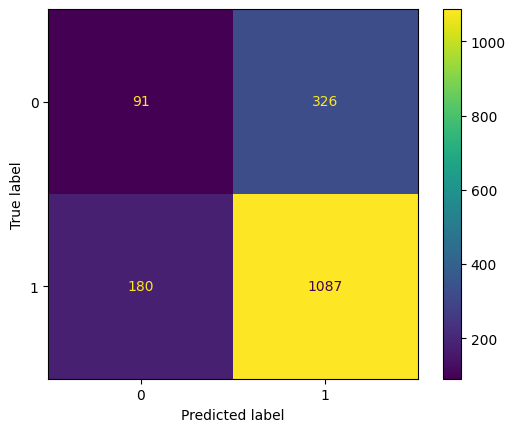

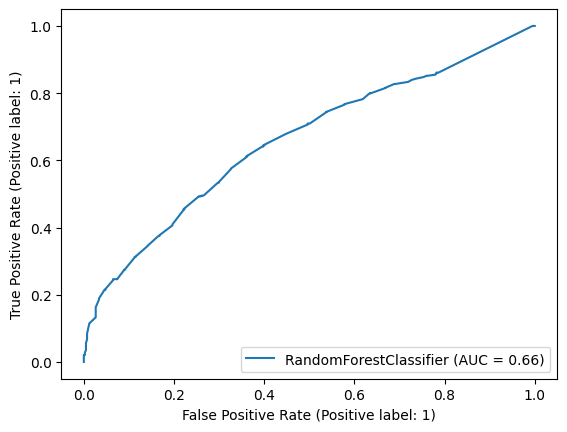

In [8]:
print('---- Original Data ----')
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = RandomForestClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = RandomForestClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### XGBoost
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* 選擇模型：GradientBoostingClassifier
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.98
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.78


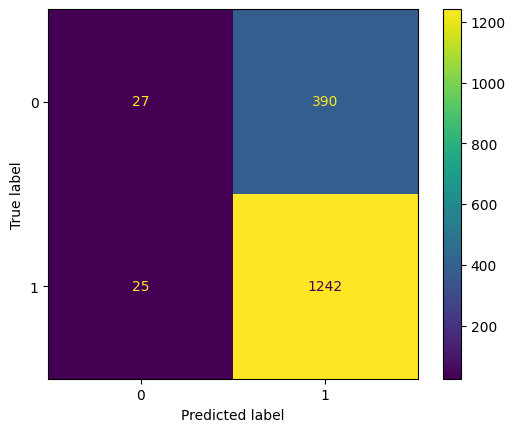

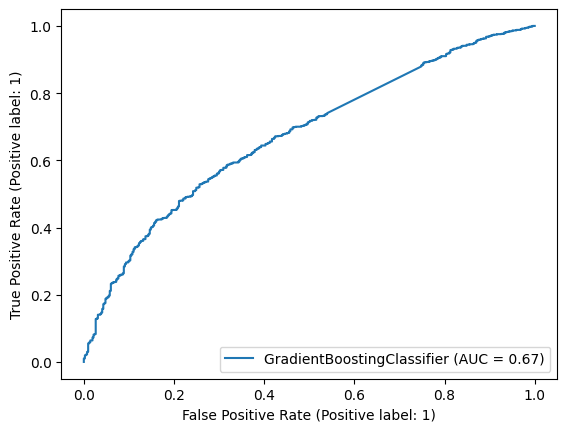

---- Under Sample Data ----
Accuracy: 0.6
Recall: 0.58
Precision: 0.84
F1-Score: 0.69
F0.5-Score: 0.77
F0.3-Score: 0.81


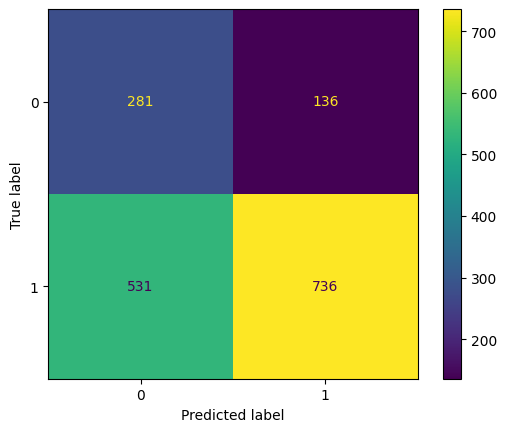

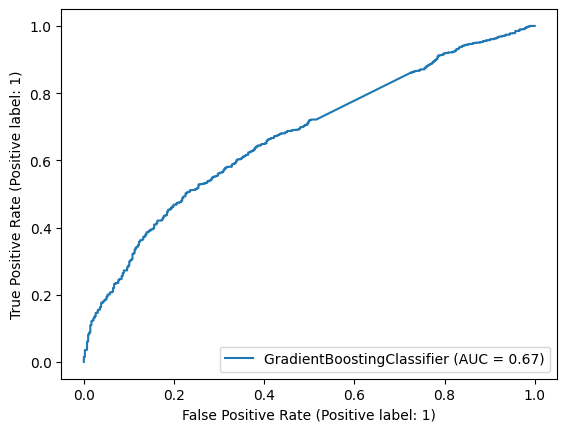

---- Over Sample Data ----
Accuracy: 0.69
Recall: 0.75
Precision: 0.82
F1-Score: 0.78
F0.5-Score: 0.8
F0.3-Score: 0.81


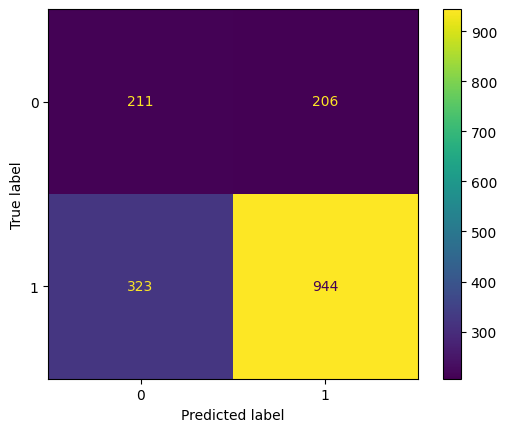

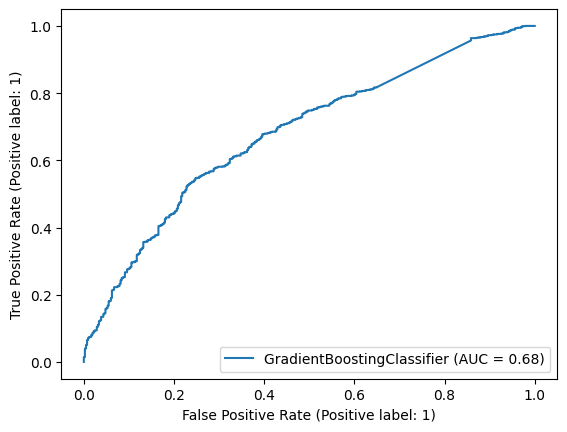

In [9]:
print('---- Original Data ----')
model = GradientBoostingClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = GradientBoostingClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = GradientBoostingClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)
